
# Project: TMDB Movies data Analyse

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This notebook consist of my analyse of the tmdb movies data set.
  This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
  
> Questions that cant be analysed
 * Which genre made more revenue?
 * Does the revenue of the movies increased over the years?
 * Which movie made more revenue?
 * What kinds of properties are associated with movies that have high revenues?
 * Does movies with more budget have more revenue?
 * What are the average runtime of the movies?
 * What are the top keywords?
 * What are the top casts?
 * What are the top directors?

In [3]:
# importing the modules I will use for this analyse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [4]:
# reading the csv file
df = pd.read_csv('tmdb-movies.csv')
# checking the first five rows to get an idea of the data we are dealing.
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> At first glance we can see that some information maybe not be usable on this analyse like the **vote_count** for example. The number is different for each movie and do not reflect the value of the **vote_average**.


>There's also other columns that I may not use because of it's litle value like **imdb_id**, **homepage**, **tagline** and **production_companies**. And may I also add that by **litle value** I mean that this only reflects on my analyse based on the questions I intend to analyse.

In [5]:
# Get more info about the data and check if there's null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>As we can see there's some columns with null values like **homepage**, **tagline**, **keywords** and **production_companies** that are the most notable columns having null values.
This will be not such a problem because most of these columns will be droped since I do not intend to use them.

In [6]:
# check all the total sum of null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

>Here I just get the total sum of the null values by column to get a better view of the empty data. 

>Although I will drop most of the columns with the most of the null values I will still use some columns with null values like the **cast**, **genres** and **director** columns. 

>Since the number of null values for these columns are small I will remove these null values as I expect that will not have a big impact on my analyses.

>I also noticed that the keywords columns have a lot of null values too, but as I intend to use that column I will keep her and remove only the null values.

In [7]:
# check the number of rows and columns before I do anything with the data
df.shape

(10866, 21)

In [8]:
# Check the number of duplicated rows
sum(df.duplicated())

1

Cool looks like there's only one row duplicated on this dataset so it's safe to drop the duplicates

In [9]:
# Getting even more information about the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> Based on the describe  output of this dataset I cant see that some important columns have zero values like the **budget** and **revenue** with may impact the analyse.

>The **runtime** column also have a min value of zero.

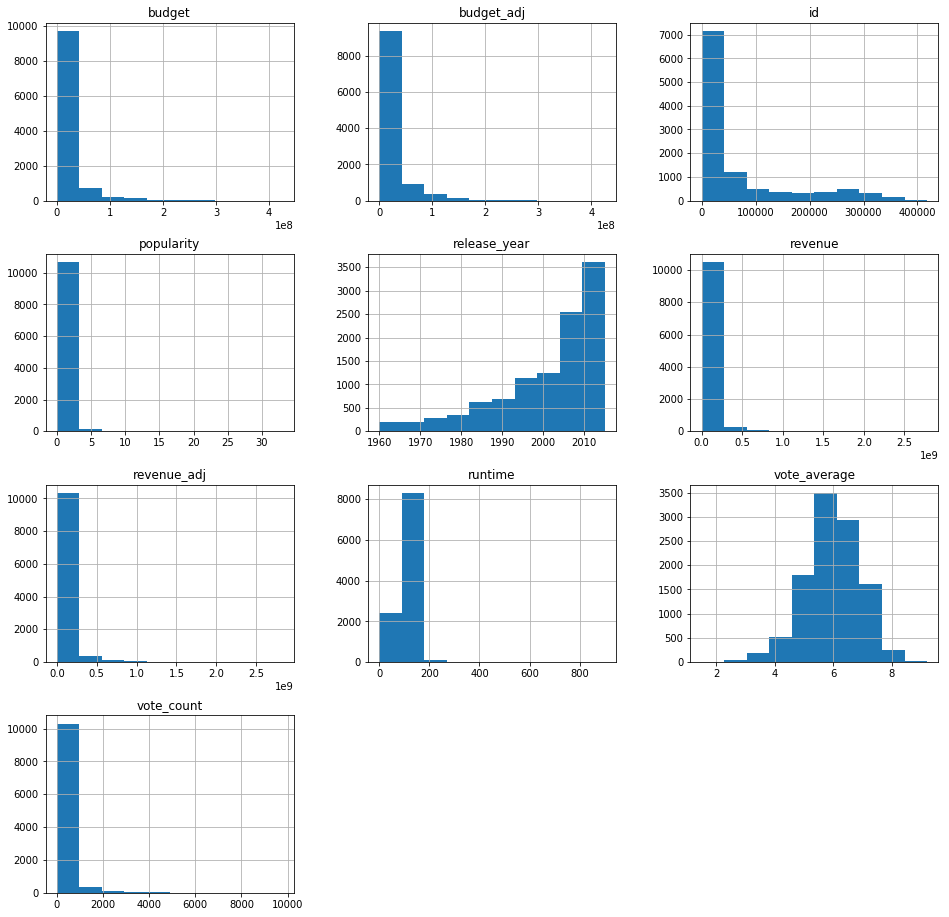

In [10]:
# ploting a histogram before I clean the data
df.hist(figsize=(16,16));

### Data Cleaning (Replace this with more specific notes!)

Here I will remove the columns that will not be used and remove rows with null or 0 values.

I will start by removing the columns I will not use.

The columns that will be deleted are:
  * vote_average 
  * imdb_id 
  * homepage 
  * tagline 
  * production_companies 
  * budget_adj 
  * revenue_adj 
  * overview

In [11]:
# creating a list with the columns name that will be deleted
delete_columns = ['vote_average', 'imdb_id', 'homepage', 'tagline', 'production_companies', 'budget_adj', 'revenue_adj', 'overview']

# deleting the columns using the drop method passing the list and the axis as value 1 that means column
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html
df.drop(delete_columns, axis=1, inplace=True)

In [12]:
# checking the first rows to see if the columns are removed
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,release_date,vote_count,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,2015


Ok as we can see the columns that we droped are not showing on the dataframe anymore with makes more easy to visualize the data by column.

>Since the **budget**, **revenue** and **runtime** have a lot of 0 values, I will remove these row converting then to a null value, so I can clean all the null values from the dataframe at once.

In [13]:
# creating a list with columns names that will be used to convert all the rows with 0 value
columns_names = ['budget', 'revenue', 'runtime']

# converting all the 0 values to NaN based on 
# https://stackoverflow.com/questions/34794067/how-to-set-a-cell-to-nan-in-a-pandas-dataframe
df[columns_names] = df[columns_names].replace(0, np.NaN)

# removing null values passing the subset parameter to remove rows only for the desired columns
df.dropna(subset=columns_names, inplace=True)

Now I'm going to drop the duplicated row

In [14]:
# Droping the duplicated rows, as we saw there's only 1
df.drop_duplicates(inplace=True)

I think all the necessary cleaning was realized, now let's just check how our dataframe looks like.

In [15]:
# check all the info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 13 columns):
id                3854 non-null int64
popularity        3854 non-null float64
budget            3854 non-null float64
revenue           3854 non-null float64
original_title    3854 non-null object
cast              3850 non-null object
director          3853 non-null object
keywords          3716 non-null object
runtime           3854 non-null float64
genres            3854 non-null object
release_date      3854 non-null object
vote_count        3854 non-null int64
release_year      3854 non-null int64
dtypes: float64(4), int64(3), object(6)
memory usage: 421.5+ KB


In [16]:
# check if still there's one duplicated row
sum(df.duplicated())

0

>Ok so it's look like we have lost a lot of data after the cleaning up process.

>We have gone from **10866** rows to only **3854**. That was something I was alredy expecting the raw data have a lot of missing values (aka 0 values) on the **budget** and **revenue**.

>The keywords is as expected missing values in some rows, but the null values are very small.

>Although the dataframe is much smaller I can still perform the analyses. But the number of missing rows is definitely a limitation and may impact the final result.

<a id='eda'></a>
## Exploratory Data Analysis


### Which genre made more revenue ?  

In [20]:
# As the genres and also cast, director are a string with values separated by | 
# I will create a function that I cant use on all these columns
# I also using information I got on https://stackoverflow.com/a/31036962 to
# create a new row for every value that got splited from the string
def split_data(data_frame, column_name, new_column_name):
    """
        This function will receive a dataframe and a column name
        and will return a new dataframe with the respective string
        for the given column name splited by |
        
        parameters:
        data_frame      -> A pandas dataframe
        column_name     -> A string with the column that will be splited.
        new_column_name -> The name that will be used on the new column on the dataframe
    """

    # creating a new pd.Series spliting the string by '|'
    splited_str = data_frame[column_name].str.split('|').apply(pd.Series,1).stack()
    splited_str.index = splited_str.index.droplevel(-1)
    splited_str.name = new_column_name
    pd.DataFrame(splited_str,columns=[new_column_name])
    new_df = data_frame.join(splited_str)
    return new_df

# get a dataframe with genre splited by pipe '|'
genres = split_data(df, 'genres', 'genre')
genre_revenue = genres.groupby('genre')['revenue'].sum()
genre_revenue

genre
Action             1.698862e+11
Adventure          1.635006e+11
Animation          5.168142e+10
Comedy             1.321831e+11
Crime              5.477715e+10
Documentary        7.883540e+08
Drama              1.305187e+11
Family             8.634026e+10
Fantasy            8.642072e+10
Foreign            1.445074e+08
History            1.050128e+10
Horror             2.652425e+10
Music              1.124279e+10
Mystery            3.131975e+10
Romance            5.719392e+10
Science Fiction    8.508129e+10
TV Movie           4.200000e+07
Thriller           1.176795e+11
War                1.261782e+10
Western            4.545472e+09
Name: revenue, dtype: float64

It's look like **action** had more revenue. Let's plot to see better

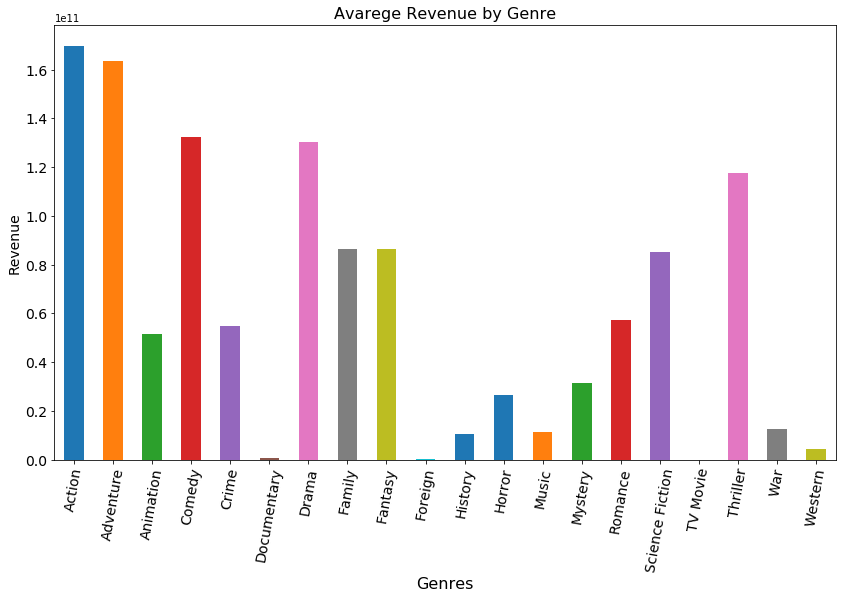

In [37]:
# using mathplotlib to plot the average revenue by genre
# plt.bar(genre_revenue.index, genre_revenue)
genre_revenue.plot(kind='bar', figsize=(14,8), fontsize=14)
# adding labels and title
plt.xlabel('Genres', fontsize=16)
plt.ylabel('Revenue', fontsize=14)
plt.title('Avarege Revenue by Genre', fontsize=16);
# changing the label rotation to better visualize the genre name
plt.xticks(rotation=80);

> As we can see **Action** and **Adventure** are the genres that have more profit on average

###   Does the revenue of the movies increased over the years?

In [39]:
# lets groupby the relese_year and sum all the revenue
revenue_by_year = df.groupby('release_year')['revenue'].sum()
revenue_by_year

release_year
1960    1.290050e+08
1961    3.377202e+08
1962    2.063298e+08
1963    1.765269e+08
1964    3.286135e+08
1965    4.580819e+08
1966    8.473669e+07
1967    7.318346e+08
1968    2.222218e+08
1969    2.297071e+08
1970    5.499720e+08
1971    3.762867e+08
1972    4.809002e+08
1973    1.115013e+09
1974    7.201670e+08
1975    8.453073e+08
1976    7.499265e+08
1977    1.882158e+09
1978    1.171270e+09
1979    1.181030e+09
1980    1.322116e+09
1981    1.612001e+09
1982    2.155656e+09
1983    1.990301e+09
1984    2.406485e+09
1985    2.263175e+09
1986    2.294455e+09
1987    2.757477e+09
1988    3.126877e+09
1989    4.571930e+09
1990    4.651536e+09
1991    4.363121e+09
1992    5.086372e+09
1993    6.176514e+09
1994    6.523191e+09
1995    8.228518e+09
1996    7.719319e+09
1997    1.040853e+10
1998    9.226155e+09
1999    1.135098e+10
2000    1.094997e+10
2001    1.324832e+10
2002    1.441043e+10
2003    1.475799e+10
2004    1.648571e+10
2005    1.609040e+10
2006    1.564052e+10


> Looks like the revenue was increased over the years.
I will plot this data for a better visualization

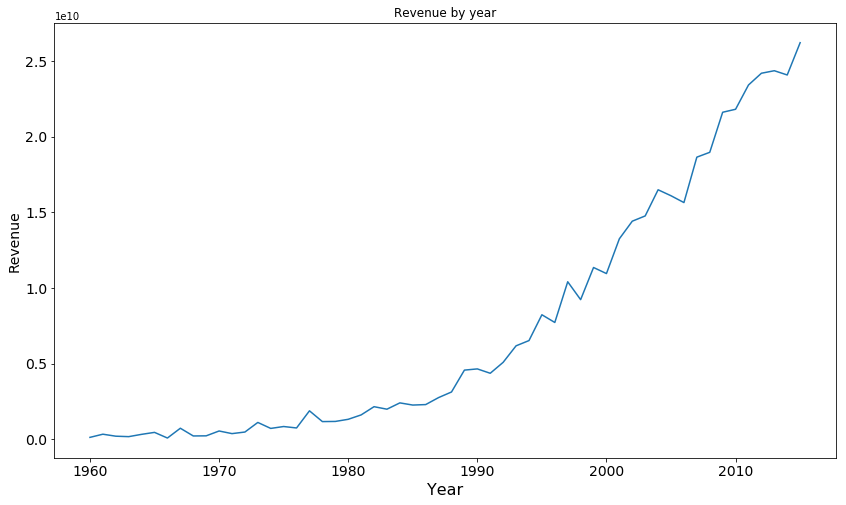

In [47]:
revenue_by_year.plot(figsize=(14,8), fontsize=14, title='Revenue by year');
plt.xlabel('Year', fontsize=16);
plt.ylabel('Revenue', fontsize=14);

> We can see that in the late 90s the movies had a increase on revenue it continued to rise over the years.

###   Which movie made more revenue?

In [71]:
# query by revenue checking if the value is equal to the max revenue
movie_highest_revenue = df.query('revenue == {}'.format(df.revenue.max()))
movie_highest_revenue

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,release_date,vote_count,release_year
1386,19995,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162.0,Action|Adventure|Fantasy|Science Fiction,12/10/09,8458,2009


> **Avatar** was the movie with the most revenue. With **2.7B** in revenue.

###   What kinds of properties are associated with movies that have high revenues?

First I will start by checking if movies with more budget have more revenue.

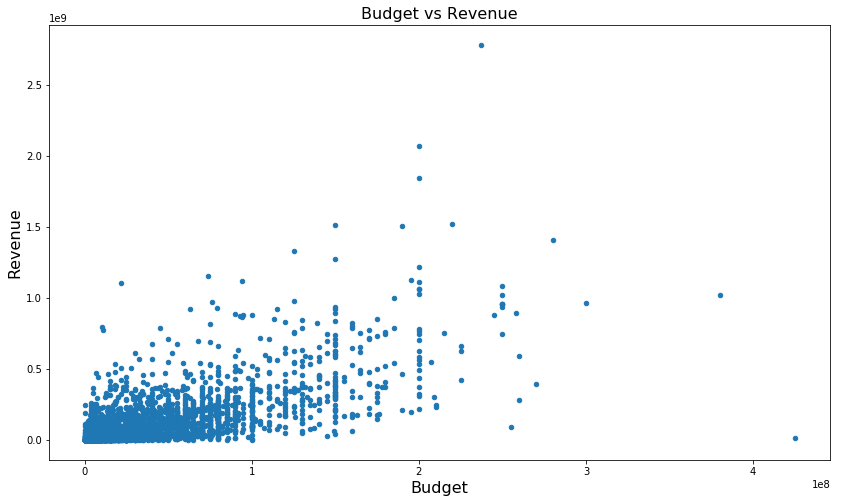

In [76]:
# Creating a scatter plot with budge and revenue
df.plot(x='budget', y='revenue', kind='scatter', figsize=(14,8))
plt.xlabel('Budget', fontsize=16)
plt.ylabel('Revenue', fontsize=16)
plt.title('Budget vs Revenue', fontsize=16);

Considering the scatter plot is possible to see that movies with higher budget in general get more revenue.

Now let's compare the runtime with the revenue.

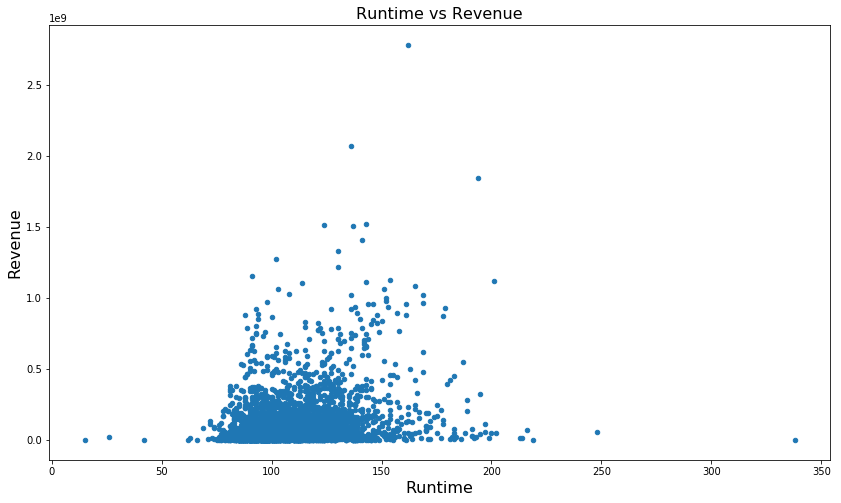

In [77]:
# Creating a scatter plot with runtime and revenue
df.plot(x='runtime', y='revenue', kind='scatter', figsize=(14,8))
plt.xlabel('Runtime', fontsize=16)
plt.ylabel('Revenue', fontsize=16)
plt.title('Runtime vs Revenue', fontsize=16);

> The runtime does not seen to have a big impact on the revenue of a movie, it's look like most of the movies with high revenue are a litle above the runtime average of 2 and 2 and half hours.


### What are the average runtime of the movies?

In [78]:
# check the average runtime
df.runtime.mean()

109.22029060716139

The average runtime of the movies are 109 minutes, almost 2 hours.

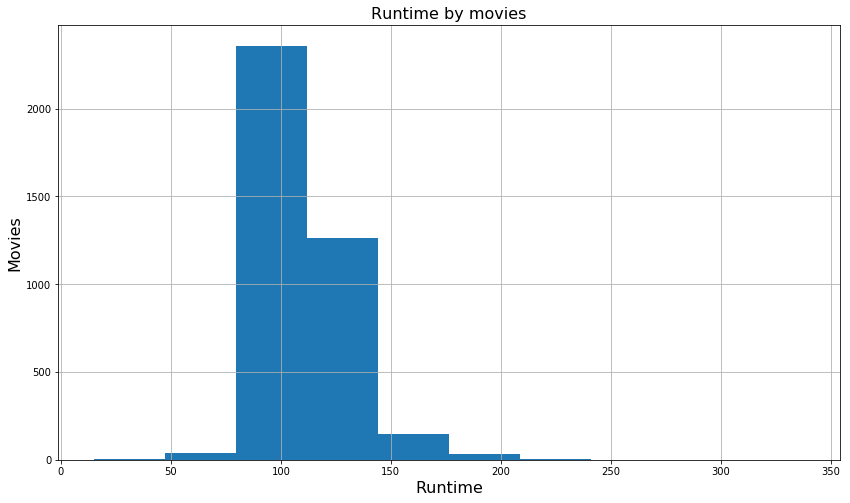

In [81]:
# histogram of runtime
df.runtime.hist(figsize=(14,8));
plt.xlabel('Runtime', fontsize=16)
plt.ylabel('Movies', fontsize=16)
plt.title('Runtime by movies', fontsize=16);

>As we can see by the histogram, most of the movies runtime are bettwen 90 and 109 minutes

>We can use describe to get more information too.

In [85]:
df.runtime.describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

### What are the top keywords?
> Here I will use the same function I created on the first question the **split_data** function with will split all the keywords by | (pipe)

In [88]:
# getting a new dataframe with all the keywords splited
keywords_df = split_data(df, 'keywords', 'keyword')
# get the top 10 keywords
top_keywords = keywords_df.keyword.value_counts().nlargest(10)
top_keywords

based on novel          168
duringcreditsstinger    101
dystopia                 95
sex                      90
independent film         86
new york                 85
prison                   75
sport                    75
murder                   70
woman director           70
Name: keyword, dtype: int64

> **Based on a novel** is the top keyword. Let's plot this data!

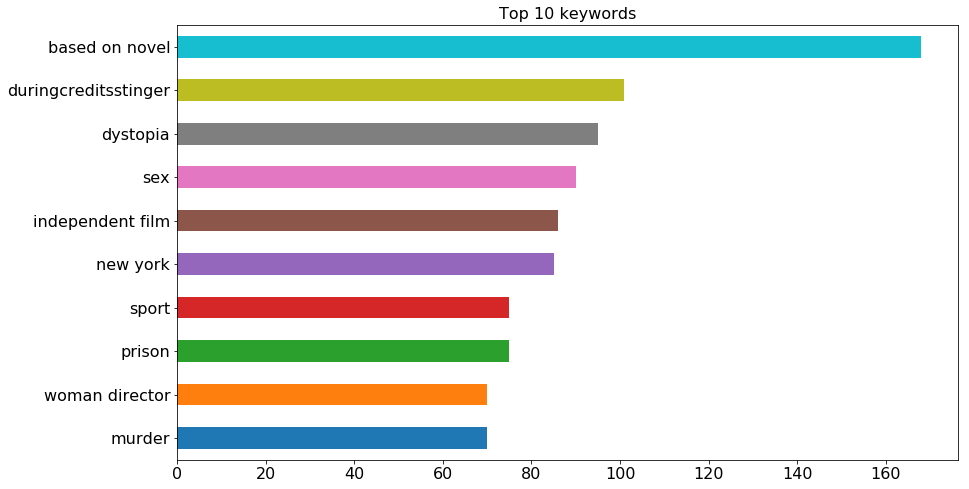

In [92]:
# sort top keywords by ascending to plot on barh
top_keywords.sort_values(ascending = True, inplace = True)
top_keywords.plot(kind='barh', figsize=(14,8), fontsize=16);
plt.title('Top 10 keywords', fontsize=16);

### What are the top cast?

> Using the same aproach, with the split_data function I will get a new dataframe with
all the casts


In [94]:
# getting a new dataframe with all the casts splited
cast_df = split_data(df, 'cast', 'cast_new')
# get the top 10 cast
top_cast = cast_df.cast_new.value_counts().nlargest(10)
top_cast

Robert De Niro        52
Bruce Willis          46
Samuel L. Jackson     44
Nicolas Cage          43
Matt Damon            36
Johnny Depp           35
Sylvester Stallone    34
Tom Hanks             34
Harrison Ford         34
Brad Pitt             34
Name: cast_new, dtype: int64

>Cool, **Robert De Niro** is the cast that are on more movies! with a total of **52**, followed by **Bruce Willis** with **46** and **Samuel L. Jackson** with **44**

### What are the top directors?

> And finally to get the top directors the same aproach applies with the split_data function

In [95]:
# getting a new dataframe with all the directors splited
director_df = split_data(df, 'director', 'director_new')
# get the top 10 directors
top_directors = director_df.director_new.value_counts().nlargest(10)
top_directors

Steven Spielberg     28
Clint Eastwood       24
Ridley Scott         21
Woody Allen          18
Steven Soderbergh    17
Robert Rodriguez     17
Tim Burton           17
Martin Scorsese      17
Renny Harlin         15
Brian De Palma       15
Name: director_new, dtype: int64

> Here we can see **Steven Spielberg** is the top director with 28 movies.

<a id='conclusions'></a>
## Conclusions

Based on the analyse of this data I found the following results:
  
  * Action and Adventure movies have more revenue
  * The revenue of the movies increased over the years specially on late 
  * Avatar was the movie with made the most revenue of 2.7B
  * Generally movies with higher budget got more revenue, it's kind of understandable since with
    more money you cant advertise more your movie.
  * Movies with runtime of 2h+ have appears to have more revenue
  * Based on a novel was the most used keyword
  * Robert De Niro was on more movies
  * Steven Spielberg directed more movies
  
  
## Limitations
  * A lot of rows have the budget and revenue with 0 value with I had to drop
    to get a more precise information.
  * Since I dropped rows with 0 values the dataframe lost 7012 rows and I ended
    with only 3854 from 10866 with is a huge loss of data and definitly have impacted
    my analyse.
  * Also would be nice to have an updated version of this data since the last year
    release of the movies are 2015